In [2]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 28.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=9451e7f4001d0e8ef0d101f84917ab58ec51631d7ff131fbe7c1362057b38708
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully buil

In [3]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

In [163]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
smarket = load_data('Smarket')
smarket.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [6]:
smarket.corr(numeric_only = 1)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


<Axes: >

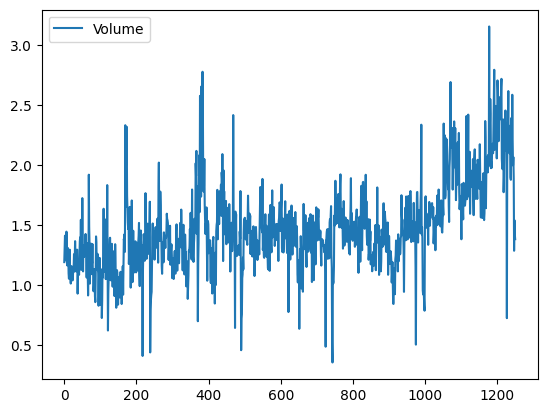

In [7]:
smarket.plot(y = 'Volume')

In [8]:
allvars = smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(smarket)
y = smarket.Direction == 'Up'
glm = sm.GLM(y, X, family = sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [9]:
results.params

,0
intercept,-0.126000
Lag1,-0.073074
Lag2,-0.042301
Lag3,0.011085
Lag4,0.009359
Lag5,0.010313
Volume,0.135441


In [10]:
results.pvalues

,0
intercept,0.600700
Lag1,0.145232
Lag2,0.398352
Lag3,0.824334
Lag4,0.851445
Lag5,0.834998
Volume,0.392404


In [11]:
probs = results.predict()
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [12]:
labels = np.array(['Down']*1250)
labels[probs>0.5] = "Up"
confusion_table(labels, smarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [13]:
np.mean(labels == smarket.Direction)

0.5216

In [14]:
train = (smarket.Year < 2005)
smarket_train = smarket.loc[train]
smarket_test = smarket.loc[~train]
smarket_test.shape

(252, 9)

In [15]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [16]:
D = smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [17]:
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [18]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.4801587301587302, 0.5198412698412699)

In [19]:
X = MS(['Lag1', 'Lag2']).fit_transform(smarket)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [20]:
np.mean(labels == L_test)

0.5595238095238095

In [21]:
lda = LDA(store_covariance=True)
X_train, X_test = [M.drop(columns=['intercept']) for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [22]:
lda.means_, lda.priors_, lda.classes_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]),
 array(['Down', 'Up'], dtype='<U4'))

In [23]:
lda.covariance_

array([[ 1.50886781, -0.03340234],
       [-0.03340234,  1.5095363 ]])

In [24]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [25]:
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [26]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [27]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [28]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [29]:
np.mean(qda_pred == L_test)

0.5992063492063492

In [30]:
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [31]:
NB.classes_, NB.class_prior_

(array(['Down', 'Up'], dtype='<U4'), array([0.49198397, 0.50801603]))

In [32]:
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [33]:
X_train[L_train == 'Down'].var(ddof=0)

,0
Lag1,1.503554
Lag2,1.532467


In [34]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [35]:
knn1 = KNeighborsClassifier(n_neighbors=1)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [36]:
(83+43)/252, np.mean(knn1_pred == L_test)

(0.5, 0.5)

In [37]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred == L_test)

0.5317460317460317

In [38]:
caravan = load_data('Caravan')
purchase = caravan.Purchase
purchase.value_counts()

,count
Purchase,
No,5474
Yes,348


In [39]:
feature_df = caravan.drop(columns=['Purchase'])

In [40]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

In [41]:
feature_std = pd.DataFrame(X_std, columns=feature_df.columns)
feature_std.std()

,0
MOSTYPE,1.000086
MAANTHUI,1.000086
MGEMOMV,1.000086
MGEMLEEF,1.000086
MOSHOOFD,1.000086
...,...
AZEILPL,1.000086
APLEZIER,1.000086
AFIETS,1.000086
AINBOED,1.000086


In [42]:
(X_train, X_test, y_train, y_test) = train_test_split(np.asarray(feature_std), purchase, test_size=1000, random_state=0)

In [43]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")

(0.111, 0.067)

In [44]:
confusion_table(knn1_pred, y_test)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


In [45]:
for K in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    templ = ('K={0:d}: # predicted to rent: {1:>2},' + '  # who did rent {2:d}, accuracy {3:.1%}')
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes','Yes']
    print(templ.format(K, pred, did_rent, did_rent / pred))

K=1: # predicted to rent: 62,  # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6,  # who did rent 1, accuracy 16.7%


K=3: # predicted to rent: 20,  # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4,  # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7,  # who did rent 1, accuracy 14.3%
K=6: # predicted to rent:  4,  # who did rent 0, accuracy 0.0%
K=7: # predicted to rent:  5,  # who did rent 1, accuracy 20.0%


In [46]:
logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > .5, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,931,67
Yes,2,0


In [47]:
logit_labels = np.where(logit_pred[:,1]>0.25, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


In [48]:
9/(20+9)

0.3103448275862069

Applied

In [49]:
weekly = load_data('Weekly')
weekly.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [50]:
print(f'{weekly.Year.min()} - {weekly.Year.max()}')

1990 - 2010


In [51]:
weekly.corr(numeric_only = 1)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<Axes: >

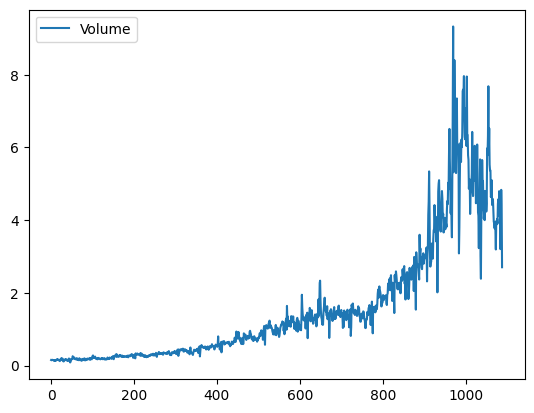

In [52]:
weekly.plot(y = 'Volume')

<Axes: >

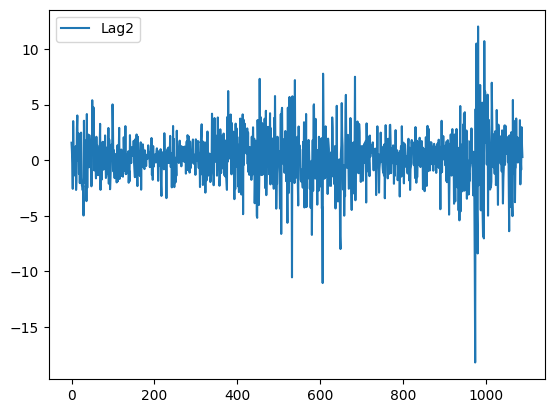

In [53]:
weekly.plot(y = 'Lag2')

Using sklearn

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
X_scaled = scaler.fit_transform(weekly.drop(columns = ['Direction']))

In [68]:
feature_std = pd.DataFrame(X_scaled, columns = feature_df.columns)
direction = weekly['Direction']
(X_train, X_test, y_train, y_test) = train_test_split(np.asarray(feature_std), direction, test_size=0.2, random_state = 0)

In [69]:
logistic_model = LogisticRegression(C = 1e5, solver = 'liblinear')
logistic_model.fit(X_train, y_train)
logit_pred = logistic_model.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > .5, 'Up', 'Down')
confusion_table(logit_labels, y_test)

Truth,Down,Up
Predicted,,
Down,100,1
Up,0,117


Using statsmodel

In [77]:
X = MS(weekly.drop(columns = ['Year', 'Today', 'Direction'])).fit_transform(weekly)
y = weekly.Direction == 'Up'
train = (weekly.Year < 2005)
X_train, y_train, X_test, y_test = X.loc[train], y.loc[train], X.loc[~train], y.loc[~train]
model = sm.GLM(y_train, X_train, family = sm.families.Binomial()).fit()

In [75]:
summarize(model)

,coef,std err,z,P>|z|
intercept,0.3810,0.131,2.914,0.004
Lag1,-0.0339,0.034,-0.987,0.324
Lag2,0.0442,0.035,1.276,0.202
Lag3,-0.0223,0.034,-0.646,0.518
Lag4,-0.0403,0.034,-1.170,0.242
Lag5,-0.0607,0.034,-1.770,0.077
Volume,-0.1809,0.152,-1.192,0.233


Predict on test set

In [91]:
probs = model.predict(exog = X_test)
D = weekly.Direction
L_test = D.loc[~train]
y_pred = np.array(['Down'] * L_test.shape[0])
y_pred[probs > 0.5] = 'Up' 
confusion_table(y_pred, L_test)

Truth,Down,Up
Predicted,,
Down,114,137
Up,27,35


In [100]:
cfs_table = confusion_table(y_pred, L_test)
cfs_table['Up']

,Up
Predicted,
Down,137
Up,35


In [103]:
print(f'Error rate: {np.mean(y_pred != L_test)}')
print(f"Type I error rate: {cfs_table['Down']['Up'] / (cfs_table['Down'].sum())}")
print(f"Type II error rate: {cfs_table['Up']['Down'] / cfs_table['Up'].sum()}")

Error rate: 0.5239616613418531
Type I error rate: 0.19148936170212766
Type II error rate: 0.7965116279069767


Predict on the whole dataset

In [106]:
probs = model.predict(exog = X)
y_pred = np.array(['Down'] * X.shape[0])
y_pred[probs > 0.5] = 'Up' 
confusion_table(y_pred, D)

Truth,Down,Up
Predicted,,
Down,163,184
Up,321,421


In [108]:
cfs_table = confusion_table(y_pred, D)
cfs_table['Up']

,Up
Predicted,
Down,184
Up,421


In [110]:
print(f'Error rate: {np.mean(y_pred != D)}')
print(f"Type I error rate: {cfs_table['Down']['Up'] / (cfs_table['Down'].sum())}")
print(f"Type II error rate: {cfs_table['Up']['Down'] / cfs_table['Up'].sum()}")

Error rate: 0.4637281910009183
Type I error rate: 0.6632231404958677
Type II error rate: 0.30413223140495865


In [112]:
train = (weekly.Year < 2009)
W_train = weekly.loc[train].Lag2
W_test = weekly.loc[~train].Lag2
W_test.shape

(104,)

In [114]:
X_train, X_test = X.loc[train].Lag2, X.loc[~train].Lag2
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()

probs = results.predict(exog=X_test)

In [116]:
D = weekly.Direction
L_test = D.loc[~train]
y_pred = np.array(['Down'] * W_test.shape[0])
y_pred[probs>0.5] = 'Up'
cfs_table = confusion_table(y_pred, L_test)

In [117]:
cfs_table

Truth,Down,Up
Predicted,,
Down,20,24
Up,23,37


In [121]:
(cfs_table['Down']['Down']+cfs_table['Up']['Up'])/(cfs_table['Down'].sum() + cfs_table['Up'].sum())

0.5480769230769231

=> Accuracy is 54.8%

Using LDA

In [137]:
lda = LDA(store_covariance=True)
X = MS(['Lag2']).fit_transform(weekly)
X_train, X_test = X.loc[train], X.loc[~train]
X_train, X_test = [M.drop(columns = ['intercept']) for M in [X_train, X_test]]
D = weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [138]:
y_pred = lda.predict(X_test)
cfs_table = confusion_table(y_pred, L_test)

In [139]:
cfs_table

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [140]:
(cfs_table['Down']['Down']+cfs_table['Up']['Up'])/(cfs_table['Down'].sum() + cfs_table['Up'].sum())

0.625

=> Accuracy LDA is 62.5%

In [141]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [142]:
y_pred = qda.predict(X_test)
cfs_table = confusion_table(y_pred, L_test)
(cfs_table['Down']['Down']+cfs_table['Up']['Up'])/(cfs_table['Down'].sum() + cfs_table['Up'].sum())

0.5865384615384616

=> Accuracy of QDA is 58.65%

In [143]:
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_train, L_train)

KNeighborsClassifier(n_neighbors=1)

In [144]:
y_pred = knn1.predict(X_test)
cfs_table = confusion_table(y_pred, L_test)
(cfs_table['Down']['Down']+cfs_table['Up']['Up'])/(cfs_table['Down'].sum() + cfs_table['Up'].sum())

0.49038461538461536

=> Accuracy of KNN is 49.04%

In [145]:
NB = GaussianNB()
NB.fit(X_train, L_train)
y_pred = NB.predict(X_test)
cfs_table = confusion_table(y_pred, L_test)
(cfs_table['Down']['Down']+cfs_table['Up']['Up'])/(cfs_table['Down'].sum() + cfs_table['Up'].sum())

0.5865384615384616

=> Accuracy of NB is 58.65% (Same as QDA!)

==> LDA gives the best result on Weekly dataset

In [146]:
auto = load_data("Auto")
auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [148]:
mpg01 = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)
auto['mpg01'] = mpg01

In [149]:
auto.corr(numeric_only = 1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


=> cylinders, weight, displacement have a strong correlation with mpg01

In [184]:
X = auto[['weight', 'displacement', 'cylinders']].values
y = auto['mpg01'].values
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state = 86)

In [185]:
lr = LogisticRegression(C = 1e5, solver = 'liblinear')
lda = LDA(store_covariance = True)
qda = QDA(store_covariance = True)
NB = GaussianNB()

In [186]:
model_lr = lr.fit(X_train, y_train)
model_lda = lda.fit(X_train, y_train)
model_qda = qda.fit(X_train, y_train)
model_NB = NB.fit(X_train, y_train)

In [187]:
y_pred_lr = lr.predict(X_test)
y_pred_lda = lda.predict(X_test)
y_pred_qda = qda.predict(X_test)
y_pred_NB = NB.predict(X_test)

In [188]:
test_err_lr = 1 - accuracy_score(y_test, y_pred_lr)
test_err_lda = 1 - accuracy_score(y_test, y_pred_lda)
test_err_qda = 1 - accuracy_score(y_test, y_pred_qda)
test_err_NB = 1 - accuracy_score(y_test, y_pred_NB)

In [192]:
print('Test error of Logistic Regression: {:.2f}'.format(test_err_lr*100), '%')
print('Test error of LDA: {:.2f}'.format(test_err_lda*100), '%')
print('Test error of QDA: {:.2f}'.format(test_err_qda*100), '%')
print('Test error of Naive Bayes: {:.2f}'.format(test_err_NB*100), '%')

Test error of Logistic Regression: 12.24 %
Test error of LDA: 12.24 %
Test error of QDA: 11.22 %
Test error of Naive Bayes: 11.22 %


In [ ]:
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print('K ={:3}, Accuracy = {:.4f}'.format(k, acc))

K =  1, Accuracy = 0.8265
K =  2, Accuracy = 0.8163
K =  3, Accuracy = 0.8673
K =  4, Accuracy = 0.8673
K =  5, Accuracy = 0.8776
K =  6, Accuracy = 0.8776
K =  7, Accuracy = 0.8878
K =  8, Accuracy = 0.8776
K =  9, Accuracy = 0.8571
K = 10, Accuracy = 0.8673
K = 11, Accuracy = 0.8673
K = 12, Accuracy = 0.8673


K = 13, Accuracy = 0.8776
K = 14, Accuracy = 0.8776
K = 15, Accuracy = 0.8776
K = 16, Accuracy = 0.8673
K = 17, Accuracy = 0.8673
K = 18, Accuracy = 0.8673
K = 19, Accuracy = 0.8673
K = 20, Accuracy = 0.8673
K = 21, Accuracy = 0.8571
K = 22, Accuracy = 0.8571
K = 23, Accuracy = 0.8571
K = 24, Accuracy = 0.8673
K = 25, Accuracy = 0.8571
K = 26, Accuracy = 0.8673
K = 27, Accuracy = 0.8571
K = 28, Accuracy = 0.8673
K = 29, Accuracy = 0.8571
K = 30, Accuracy = 0.8673
K = 31, Accuracy = 0.8571
K = 32, Accuracy = 0.8571
K = 33, Accuracy = 0.8571
K = 34, Accuracy = 0.8571
K = 35, Accuracy = 0.8571
K = 36, Accuracy = 0.8571
K = 37, Accuracy = 0.8571
K = 38, Accuracy = 0.8571
K = 39, Accuracy = 0.8878
K = 40, Accuracy = 0.8776
K = 41, Accuracy = 0.8878
K = 42, Accuracy = 0.8673
K = 43, Accuracy = 0.8776
K = 44, Accuracy = 0.8776
K = 45, Accuracy = 0.8878
K = 46, Accuracy = 0.8571
K = 47, Accuracy = 0.8673
K = 48, Accuracy = 0.8571
K = 49, Accuracy = 0.8571
K = 50, Accuracy = 0.8673
K = 51, Accu